In [144]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import *

Initialization

In [145]:
weights1 = np.random.uniform(-0.5,0.5,[3,2])  
weights2 = np.random.uniform(-0.5,0.5,[4])  

1. Forward propagation

In [146]:
def getH (weights1,x) :
    return dot(weights1,[1,x])

def getS (weights1,x) :
    return np.tanh(getH(weights1,x))

def output (weights1,weights2,x) :
    return dot(weights2,[1] + [getS(weights1,x)[i] for i in range(3)])

data = str.split("""0.5503 -0.5894
0.9206 -0.2507
0.5359 -0.0468
0.6081 -0.3402
0.0202 0.2857
0.8545 -1.0683
0.2357 0.8605
0.4847 -0.0801
0.3996 0.6837
0.1957 1.1850""", "\n")

inputs = [float(str.split(data[i]," ")[0]) for i in range(10)]
targets = [float(str.split(data[i]," ")[1]) for i in range(10)]

def getOutputs (weights1,weights2,inputs) :
    return [output(weights1,weights2,inputs[i]) for i in range(10)]

2. Output error

In [147]:
def getError (outputs,targets) :
    return 0.1*sum([0.5*(outputs[i]-targets[i])**2 for i in range(10)])

3. Backpropagation

In [148]:
def delta2 (outputs,targets,inputs,weights1,weights2,i) :
    return -0.1*sum([(outputs[n]-targets[n])*getS(weights1,inputs[n]) for n in range(10)])

def delta1 (outputs,targets,inputs,weights1,weights2,i,j) :
    return -0.1*sum([(outputs[n]-targets[n])*weights2[i]*(1-(np.tanh(getH(weights1,inputs[n])[i])**2))*[1,inputs[n]][j] for n in range(10)])

4. Weight update

In [149]:
def update2(outputs,targets,inputs,weights1,weights2,rate) :
    return [weights2[i]+rate*delta2(outputs,targets,inputs,weights1,weights2,i) for i in range(4)]

def update1(outputs,targets,inputs,weights1,weights2,rate) :
    return [[weights1[i][j]+rate*delta1(outputs,targets,inputs,weights1,weights2,i,j) for j in range(2)] for i in range (3)]

Loop

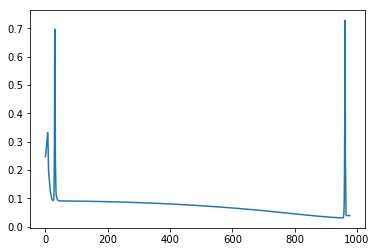

In [150]:
e = 10
errors = [10]
deltae = 10
i = 0
while abs(deltae)/e >= 0.00001 and i <= 3000 :
    i += 1
    outputs = getOutputs (weights1,weights2,inputs)
    e = getError (outputs,targets)
    deltae = float(errors[-1])-e
    errors.append(e)
    weights2,weights1 = update2(outputs,targets,inputs,weights1,weights2,0.5),update1(outputs,targets,inputs,weights1,weights2,0.5)
    
del errors[0]

plt.plot(errors)